### ESM-GCN multi-task vs single task

IndexError: list index out of range

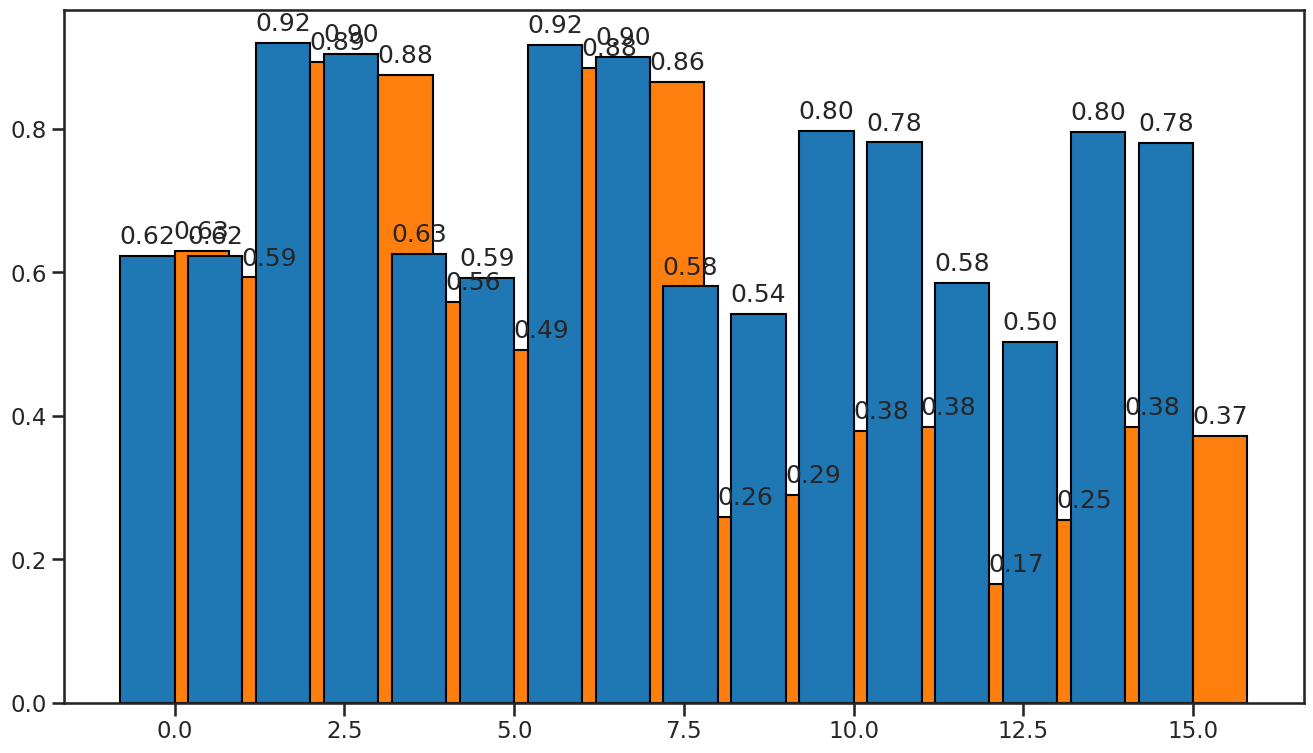

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

r2_single_dict = {
    "A.binding": 0.6223320840124591, "A.expression": 0.6299081382919702,
    "B.binding": 0.6231528276600872, "B.expression": 0.5926177410430962,
    "C.binding": 0.9199186564939315, "C.expression": 0.8927694832955763,
    "D.binding": 0.9038806813486306, "D.expression": 0.875455388375682,
    "E.binding": 0.625986065495006, "E.expression": 0.5588155950380087,
    "F.binding": 0.5919726399364468, "F.expression": 0.49129026335418013,
    "G.binding": 0.9164182530019397, "G.expression": 0.8843692707214785,
    "H.binding": 0.8996575171700016, "H.expression": 0.8646748869896883
}
r2_single_dict = {
    f"{k}.single": v for k, v in r2_single_dict.items()
}

r2_multi_dict = {
    "A.binding": 0.5801805217032834, "A.expression": 0.25901626737167327,
    "B.binding": 0.5417112106429208, "B.expression": 0.28912539336795395,
    "C.binding": 0.7963605894734448, "C.expression": 0.37889686736716,
    "D.binding": 0.7808172769475568, "D.expression": 0.3843900179056514,
    "E.binding": 0.5845440525671, "E.expression": 0.16567661241261977,
    "F.binding": 0.5028545457765108, "F.expression": 0.25419138302115274,
    "G.binding": 0.7952799829719348, "G.expression": 0.3843366986950859,
    "H.binding": 0.7806129934801138, "H.expression": 0.3717064014171383
}
r2_multi_dict = {
    f"{k}.multi": v for k, v in r2_multi_dict.items()
}

# Manual spacing
models = list("ABCDEFGH")
positions = [
    0, 1, 2, 3, 4, 5, 6, 7, 
    8, 9, 10, 11, 12, 13, 14, 15,
    18, 20, 22, 24, 26, 28, 30, 32
]
binding_vals = [r2_single_dict[f"{m}.binding.single"] for m in models] + [r2_multi_dict[f"{m}.binding.multi"] for m in models]
expression_vals = [r2_single_dict[f"{m}.expression.single"] for m in models] + [r2_multi_dict[f"{m}.expression.multi"] for m in models]

# Plot
sns.set_style("ticks")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(16, 9))

# Plot one pair to get width
sample_binding_bar = ax.bar(positions[0], binding_vals[0], label="Binding", color="tab:blue", edgecolor="black")
sample_expression_bar = ax.bar(positions[0], expression_vals[0], label="Expression", color="tab:orange", edgecolor="black")

# Get bar width dynamically
bar_width = sample_binding_bar[0].get_width()
offset = bar_width / 2

# Clear and replot all with dynamic width
ax.cla()
for i, pos in enumerate(positions):
    binding_bar = ax.bar(pos - offset, binding_vals[i], width=bar_width, color="tab:blue", edgecolor="black", label="Binding" if i == 0 else "")
    expr_bar = ax.bar(pos + offset, expression_vals[i], width=bar_width, color="tab:orange", edgecolor="black", label="Expression" if i == 0 else "")
    
    # Annotations
    ax.text(pos - offset, binding_vals[i] + 0.01, f"{binding_vals[i]:.2f}", ha="center", va="bottom")
    ax.text(pos + offset, expression_vals[i] + 0.01, f"{expression_vals[i]:.2f}", ha="center", va="bottom")

# X-axis labels centered
ax.set_xticks(positions)
ax.set_xticklabels(models)

ax.set_ylabel("R²")
ax.set_ylim(0, 1)
ax.set_xlabel("Model")
ax.legend(loc='upper left', frameon=True)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure to the "figures" subdirectory.
save_path = "bar/best_esm_gcn_be_vs_esm_gcn-r_squared"
plt.savefig(f"{save_path}.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.savefig(f"{save_path}.png", format='png', dpi=300, bbox_inches='tight')